In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy as sp

import pandas as pd

from sklearn.utils import shuffle
from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import metrics

from scipy import stats

from tqdm import tqdm

from sklearn.datasets import load_boston

from sklearn.datasets import load_iris

from sklearn.datasets import load_diabetes

from sklearn.datasets import load_wine

import pickle

from scipy.optimize import minimize

#Mylib


In [2]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 40
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=24
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

In [3]:
n = 4

In [4]:
def func_1D_mean_approx(m, featur, w):
    return w[0] -(w[1]**2)*np.exp(-(w[2]**2)*m)-(w[3]**2)/(m**1.5)

def func_1D_std_approx(m, featur, w):
    return (w[1]**2)*np.exp(-(w[2]**2)*m)+(w[3]**2)/(m**1.5)

def approxomation_one(SampleStep, List_mean, SampleStep_approximate, 
                      n = 4, M = None, print_progres = False, func = func_1D_mean_approx, List_of_w0 = None):
    List_mean_approximate = []
    
    if List_of_w0 is None:
        List_of_w0 = []
        for i in range(len(List_mean)):
            List_of_w0.append(np.random.normal(size = n))
    
    if print_progres == True:
        List_mean_for = tqdm(enumerate(zip(List_mean, List_of_w0)))
    if print_progres == False:
        List_mean_for = enumerate(zip(List_mean, List_of_w0))

    List_of_w = []
        
    for i, (mean, w_0) in List_mean_for:
        
        if M is not None:
            X_train_phi = SampleStep[0:M]
            y_train_phi = mean[0:M]
        else:
            X_train_phi = SampleStep
            y_train_phi = mean
            
        minimum = minimize(lambda w: ((func(X_train_phi, i+1, w) - y_train_phi)**2).sum(), w_0)
        List_mean_approximate.append(func(SampleStep_approximate, i+1, minimum['x']))
        List_of_w.append(minimum['x'])
    return List_mean_approximate, List_of_w

# def generate_sample(List_mean, List_std, M = None):    
#     for mean, std in zip(List_mean, List_std):
#         mean= np.array(mean)
#         if M is None:
#             M = mean.shape[0]
#         elif M > mean.shape[0]:
#             M = mean.shape[0]
    
#     List_of_sample = []
#     for mean, std in zip(List_mean, List_std):
#         new_mean = np.zeros(M)
#         for i in range(M):
#             new_mean[i] = np.random.normal(mean[i], std[i])
#         List_of_sample.append(new_mean)
    
#     return List_of_sample

# def approximation(SampleStep, List_mean, List_std, SampleStep_approximate, 
#                   n = 4, M = 80, print_progres = False, k_for_meaning = 100, func = func_1D_mean_approx, List_of_w0 = None):
#     List_of_approximation = []
    
#     if print_progres == True:
#         k_for_meaning_for = tqdm(range(k_for_meaning)) 
#     if print_progres == False:
#         k_for_meaning_for = range(k_for_meaning)
    
#     for k in k_for_meaning_for:
#         List_of_sample = generate_sample(List_mean, List_std, M = M)
#         mean, _ = approxomation_one(SampleStep, List_of_sample, SampleStep_approximate, n = n, M = M, func = func, List_of_w0 = List_of_w0)
#         List_of_approximation.append(mean)
        
    
#     return np.mean(List_of_approximation, axis=0), np.std(List_of_approximation, axis=0)


In [5]:
k_for_meaning = 100

# Boston

In [6]:
l = 26

In [7]:
M = 50

In [8]:
ordering, SampleStep, List_mean, List_std, X_train, y_train, X_test, y_test = pickle.load(open("saved_graph/boston5000.p", "rb"))


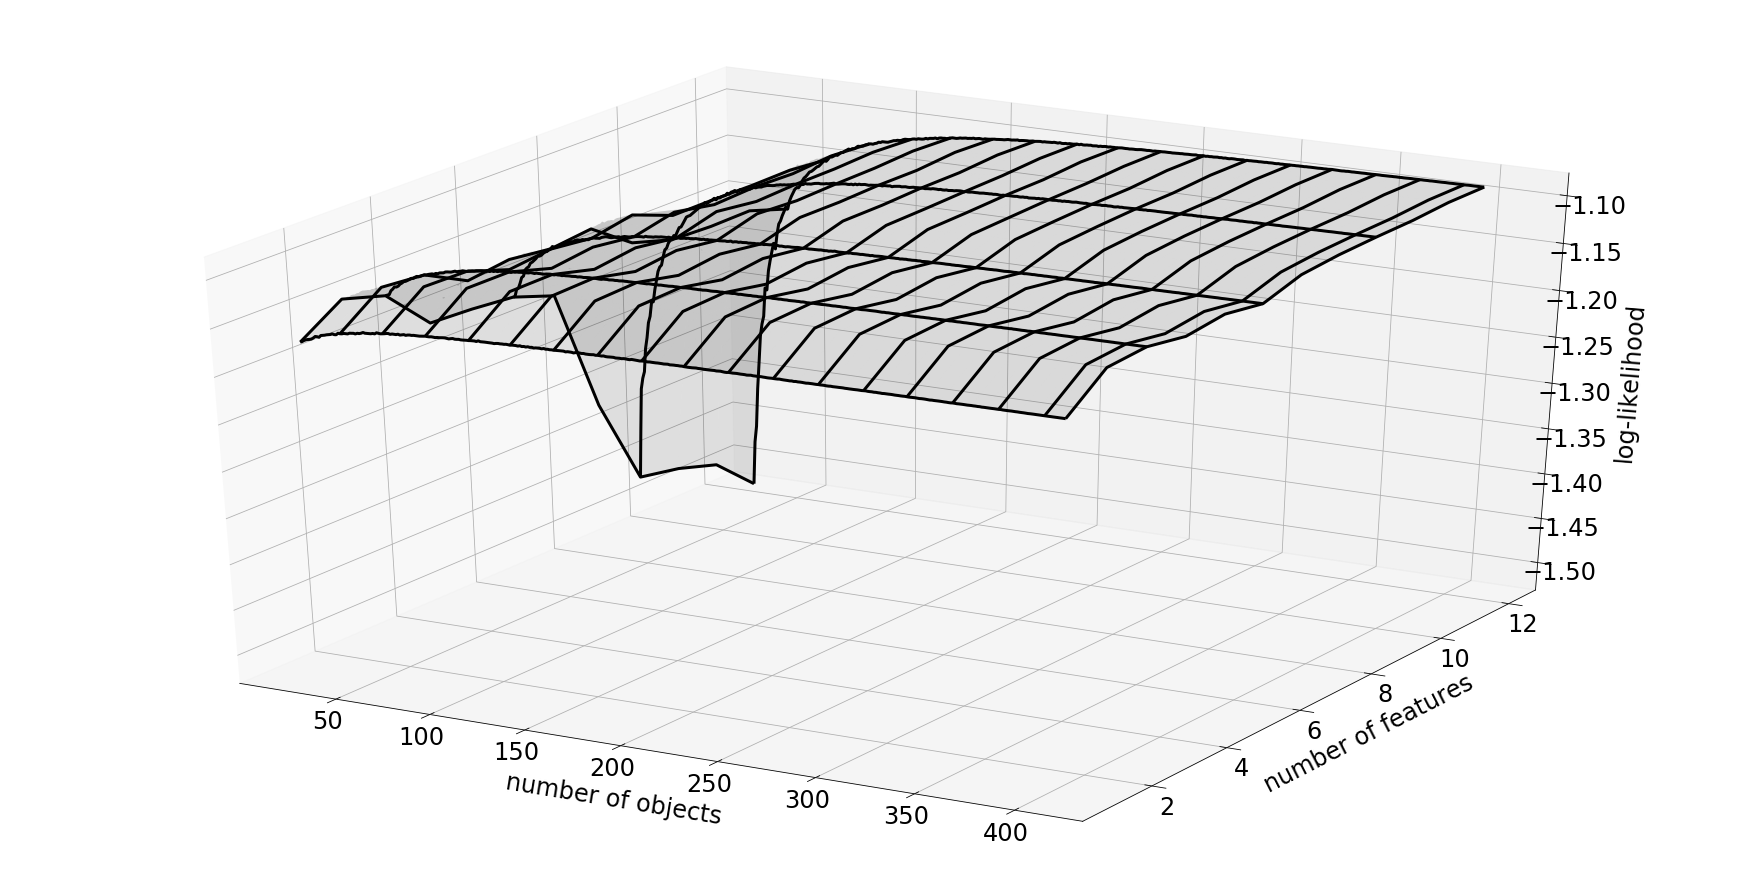

In [9]:
x = SampleStep
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))

xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean)

fig = plt.figure()
axes = Axes3D(fig)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=3, cstride=20, color ='black')
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.1, color ='black')

axes.set_xlabel("number of objects", labelpad=30)
axes.set_ylabel("number of features", labelpad=20)
axes.set_zlabel("log-likelihood", labelpad=20)

plt.show()



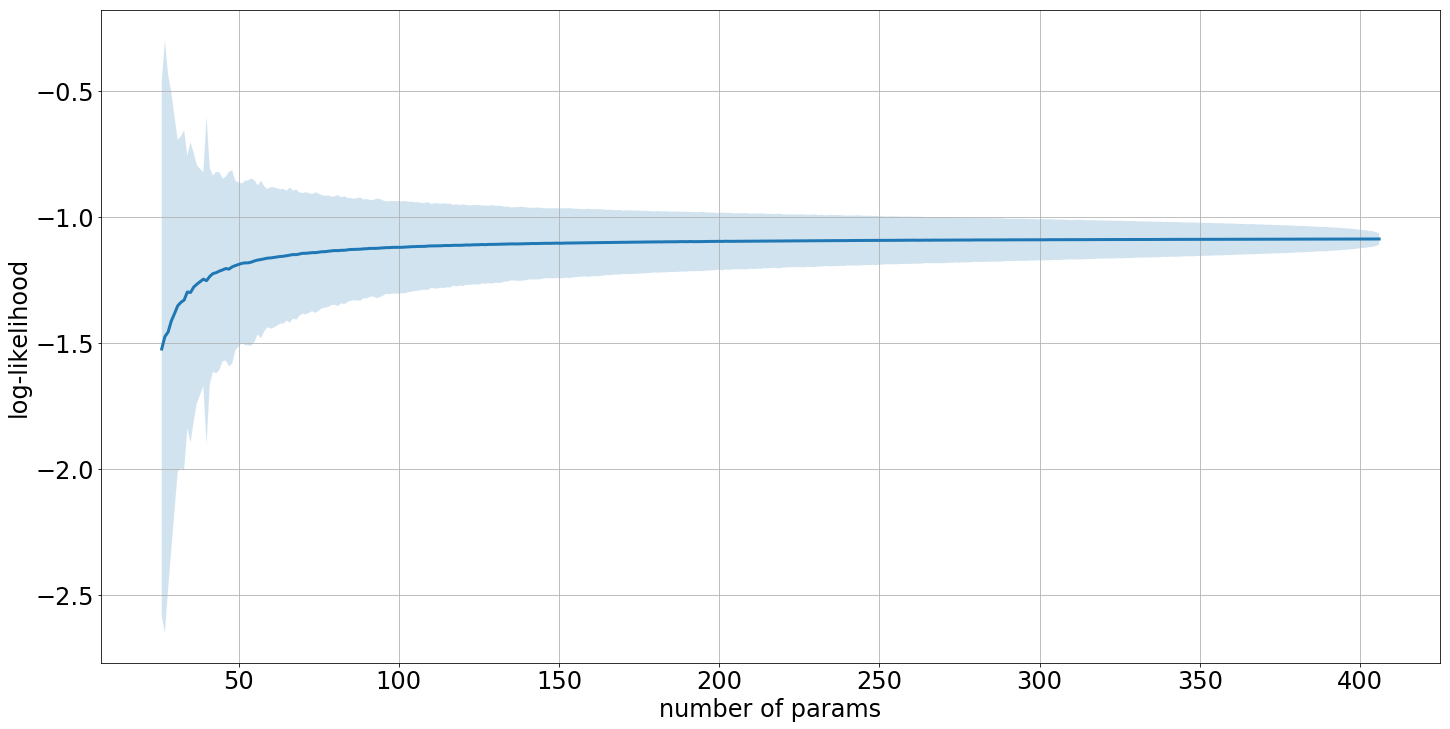

In [10]:
N = 0
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean)
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2)

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.savefig("./figures/boston_real5000.pdf")

plt.show()

In [11]:
np.random.rand(0)

SampleStep_approximate = np.linspace(l, 500, 100, dtype=np.int64)

In [12]:
Temp_list = []

for i in tqdm(range(100)):
    List_mean_approximate, List_optimal_w = approxomation_one(SampleStep, List_mean, 
                                          SampleStep_approximate, n = n, M = M - l)
    Temp_list.append(List_mean_approximate)

Temp_list = np.array(Temp_list)
    
List_mean_approximate = np.mean(Temp_list, axis = 0)
List_mean_std_for_approximate = np.std(Temp_list, axis = 0)


100%|██████████| 100/100 [00:21<00:00,  6.28it/s]


In [13]:
Temp_list = []

for i in tqdm(range(10)):
    List_std_approximate, List_optimal_w = approxomation_one(SampleStep, List_std, SampleStep_approximate, 
                                                             func = func_1D_std_approx,
                                                             n = n, M = M-l)
    Temp_list.append(List_std_approximate)

Temp_list = np.array(Temp_list)
    
List_std_approximate = np.mean(Temp_list, axis = 0)
List_std_std_for_approximate = np.std(Temp_list, axis = 0)



100%|██████████| 10/10 [00:02<00:00,  3.78it/s]


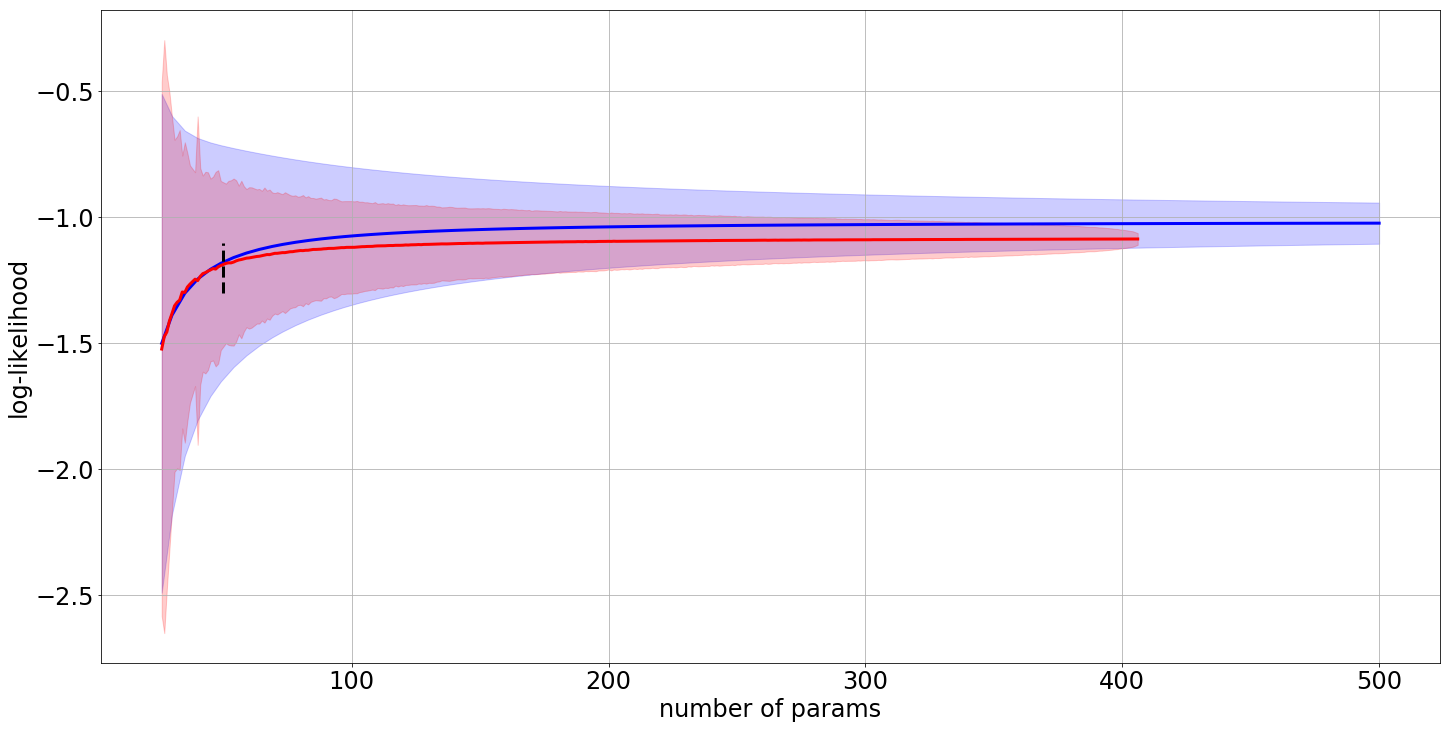

In [14]:
N = 0
mean = np.array(List_mean_approximate[N])
std = np.array(List_std_approximate[N])

plt.plot(SampleStep_approximate, mean, color = 'blue')
plt.fill_between(SampleStep_approximate, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'blue')

mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'red')

plt.plot(50*np.ones(100), np.linspace(-1.3,-1.1, 100), "--", color = 'black')

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.savefig("./figures/boston_std_boston5000.pdf")

plt.show()

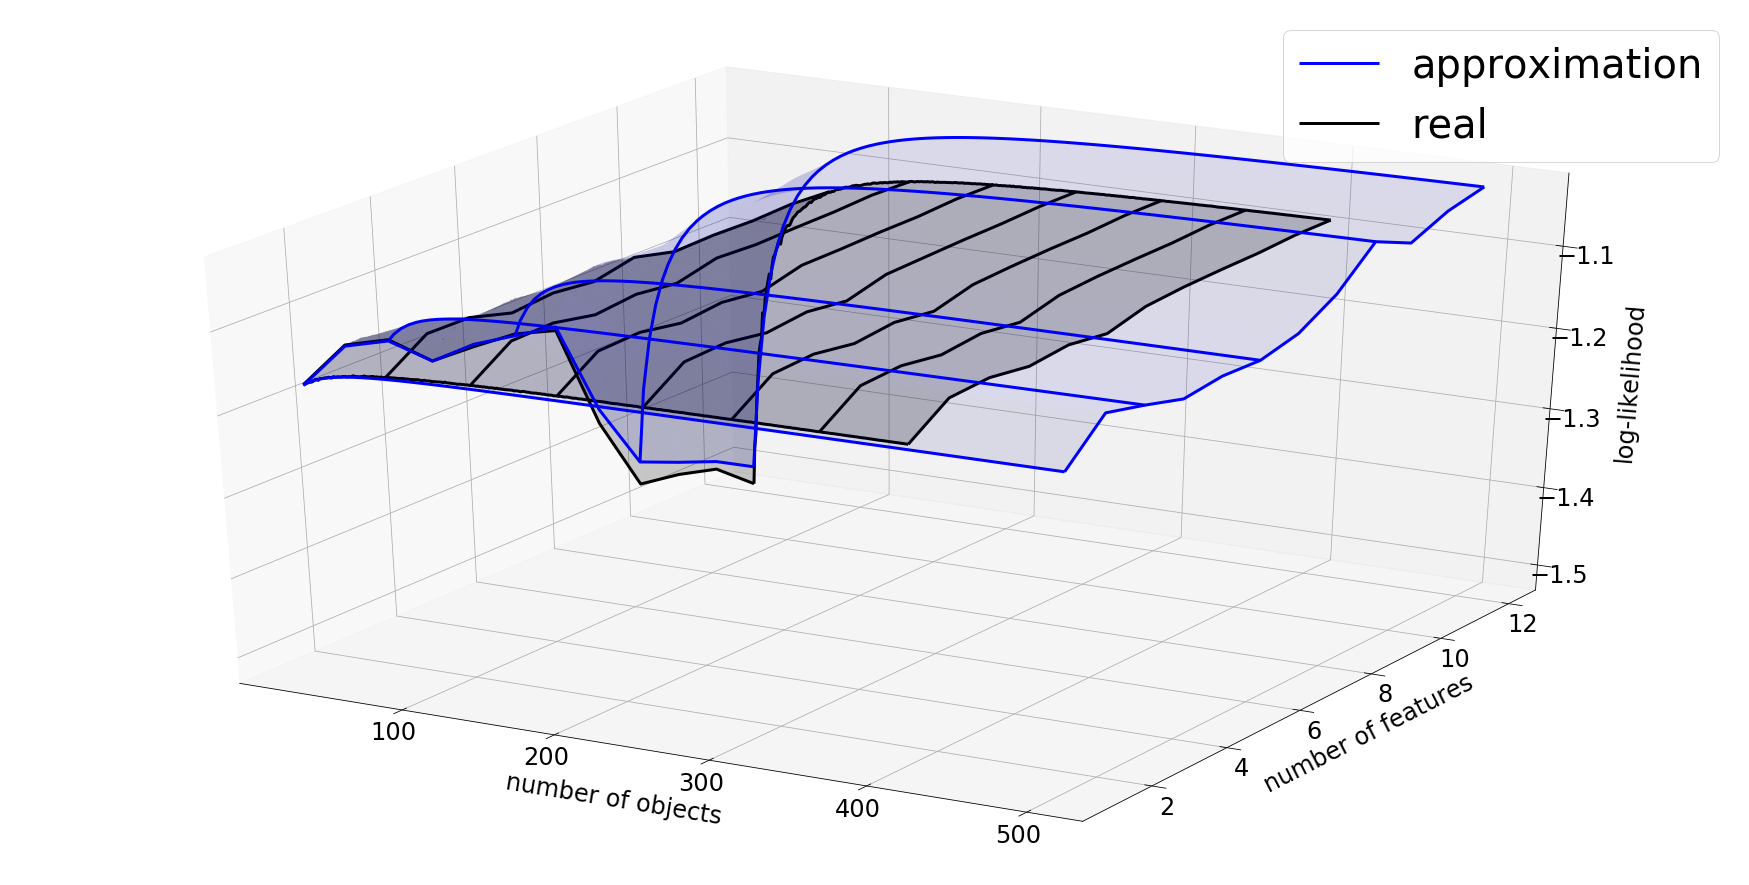

In [15]:
fig = plt.figure()
axes = Axes3D(fig)

x = SampleStep_approximate
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))
xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean_approximate)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=3, cstride=2000, color ='blue', label = "approximation")
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.1, color ='blue')


x = SampleStep
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))
xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=100, cstride=50, color ='black', label = "real")
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.2, color ='black')

axes.set_xlabel("number of objects", labelpad=30)
axes.set_ylabel("number of features", labelpad=20)
axes.set_zlabel("log-likelihood", labelpad=20)

plt.legend(loc = "best")
plt.savefig("./figures/Boston5000Approx.pdf")
plt.show()





# Diabets

In [16]:
l = 20

In [17]:
M = 50

In [18]:
ordering, SampleStep, List_mean, List_std, X_train, y_train, X_test, y_test = pickle.load(open("saved_graph/diabets5000.p", "rb"))


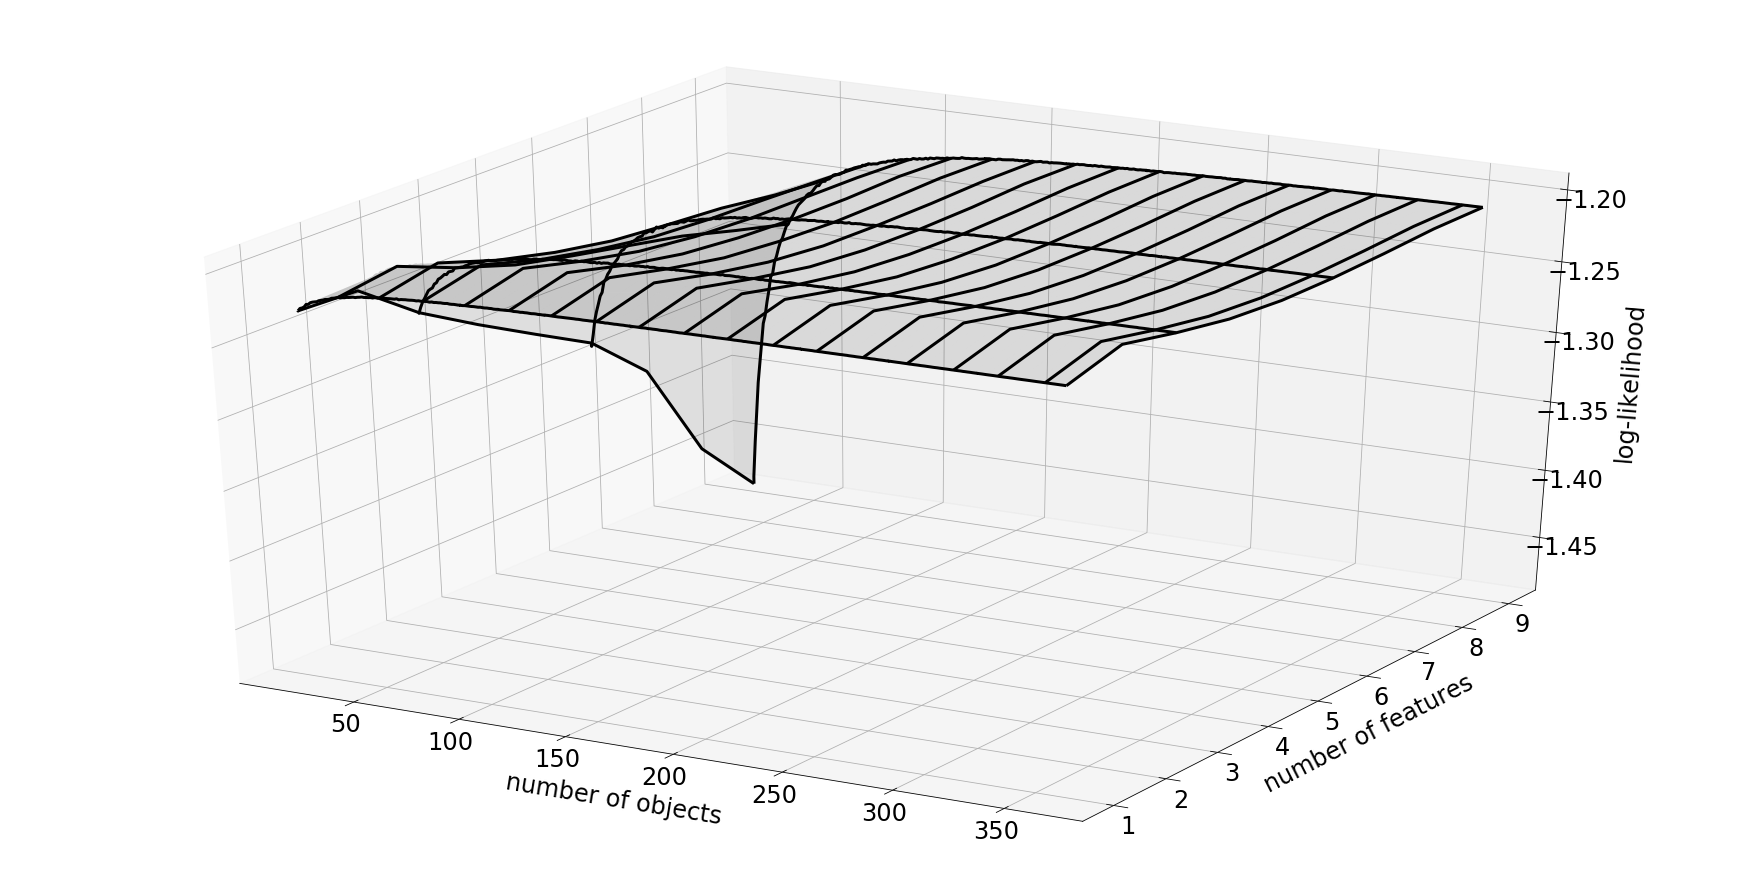

In [19]:
x = SampleStep
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))

xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean)

fig = plt.figure()
axes = Axes3D(fig)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=3, cstride=20, color ='black')
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.1, color ='black')

axes.set_xlabel("number of objects", labelpad=30)
axes.set_ylabel("number of features", labelpad=20)
axes.set_zlabel("log-likelihood", labelpad=20)

plt.show()




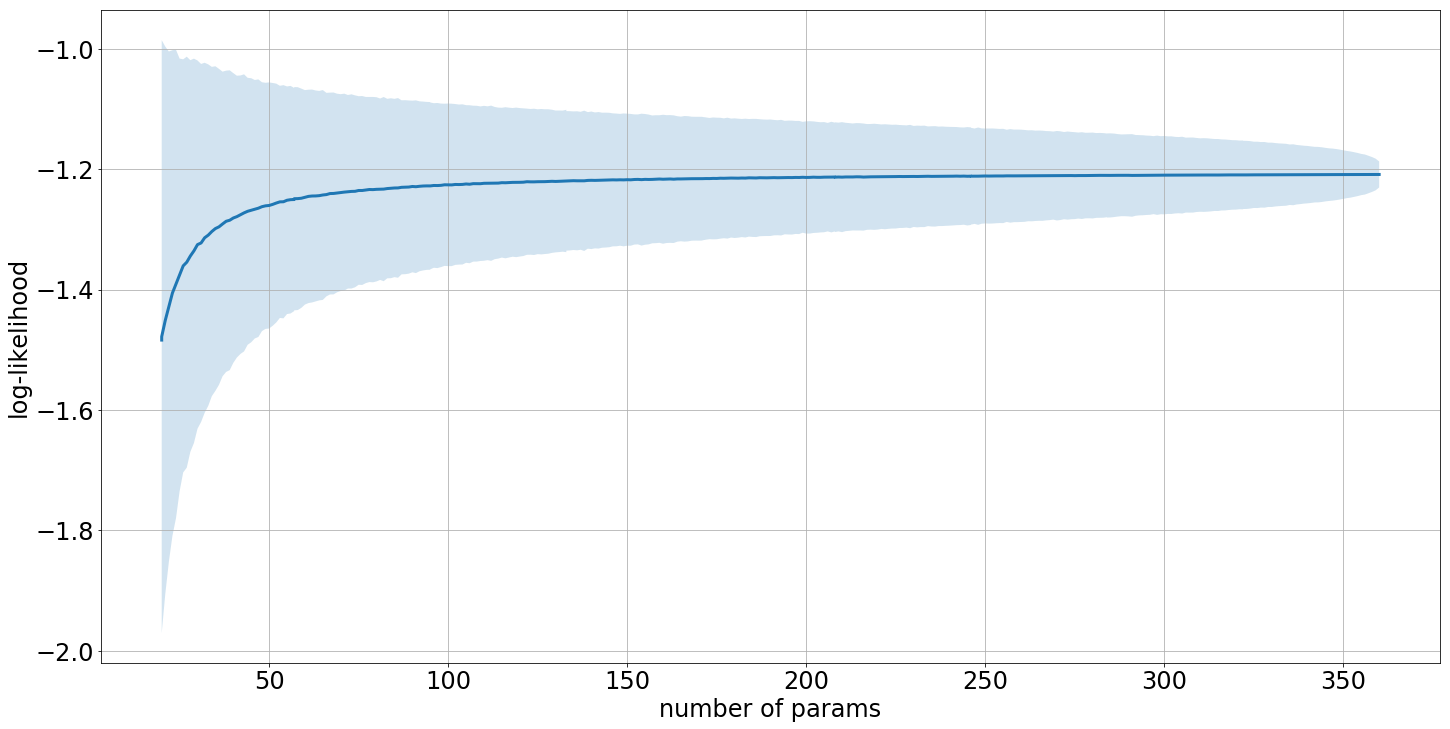

In [20]:
N = 0
mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean)
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2)

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.savefig("./figures/diabetes_real5000.pdf")

plt.show()

In [21]:
np.random.rand(0)

SampleStep_approximate = np.linspace(l, 500, 100, dtype=np.int64)

In [22]:
Temp_list = []

for i in tqdm(range(100)):
    List_mean_approximate, List_optimal_w = approxomation_one(SampleStep, List_mean, 
                                          SampleStep_approximate, n = n, M = M - l)
    Temp_list.append(List_mean_approximate)

Temp_list = np.array(Temp_list)
    
List_mean_approximate = np.mean(Temp_list, axis = 0)
List_mean_std_for_approximate = np.std(Temp_list, axis = 0)


100%|██████████| 100/100 [00:12<00:00,  8.06it/s]


In [23]:
Temp_list = []

for i in tqdm(range(10)):
    List_std_approximate, List_optimal_w = approxomation_one(SampleStep, List_std, SampleStep_approximate, 
                                                             func = func_1D_std_approx,
                                                             n = n, M = M-l)
    Temp_list.append(List_std_approximate)

Temp_list = np.array(Temp_list)
    
List_std_approximate = np.mean(Temp_list, axis = 0)
List_std_std_for_approximate = np.std(Temp_list, axis = 0)



100%|██████████| 10/10 [00:00<00:00, 11.65it/s]


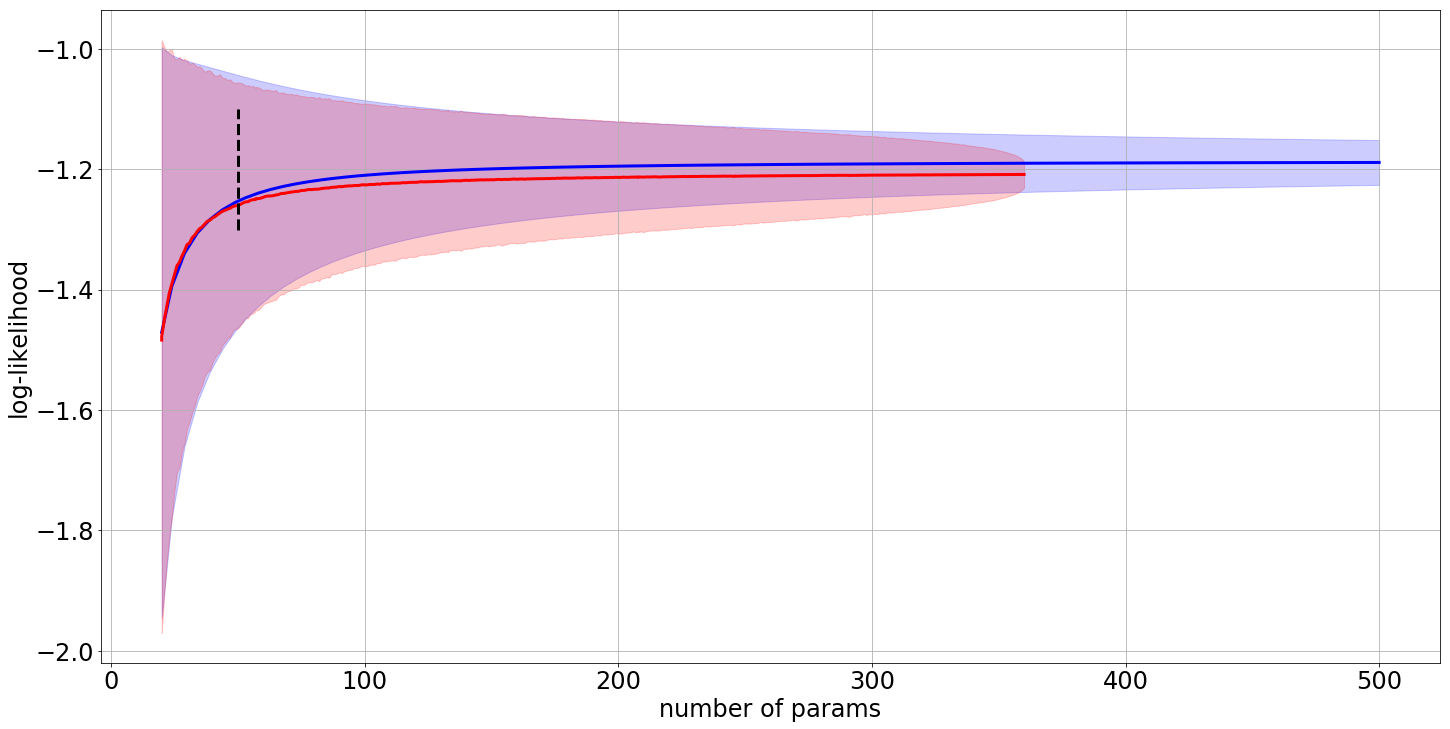

In [24]:
N = 0
mean = np.array(List_mean_approximate[N])
std = np.array(List_std_approximate[N])

plt.plot(SampleStep_approximate, mean, color = 'blue')
plt.fill_between(SampleStep_approximate, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'blue')

mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'red')

plt.plot(50*np.ones(100), np.linspace(-1.3,-1.1, 100), "--", color = 'black')

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.savefig("./figures/diabetes_std_boston5000.pdf")

plt.show()

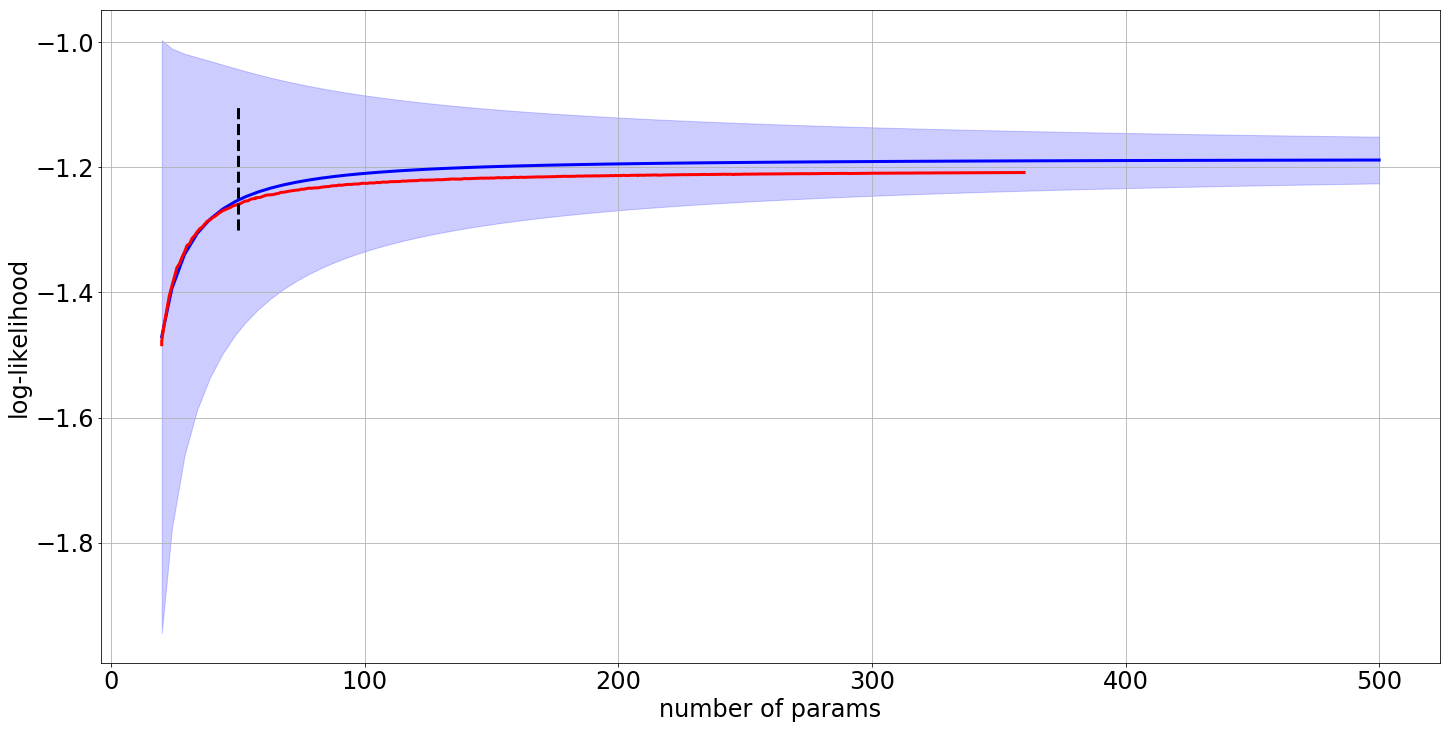

In [25]:
N = 0
mean = np.array(List_mean_approximate[N])
std = np.array(List_std_approximate[N])

plt.plot(SampleStep_approximate, mean, color = 'blue')
plt.fill_between(SampleStep_approximate, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'blue')

mean = np.array(List_mean[N])
std = np.array(List_std[N])

plt.plot(SampleStep, mean, color = 'red')
# plt.fill_between(SampleStep, mean-np.sqrt(std), mean+np.sqrt(std), alpha=0.2, color = 'red')

plt.plot(50*np.ones(100), np.linspace(-1.3,-1.1, 100), "--", color = 'black')

plt.xlabel('number of params')
plt.ylabel('log-likelihood')
plt.grid()

plt.show()

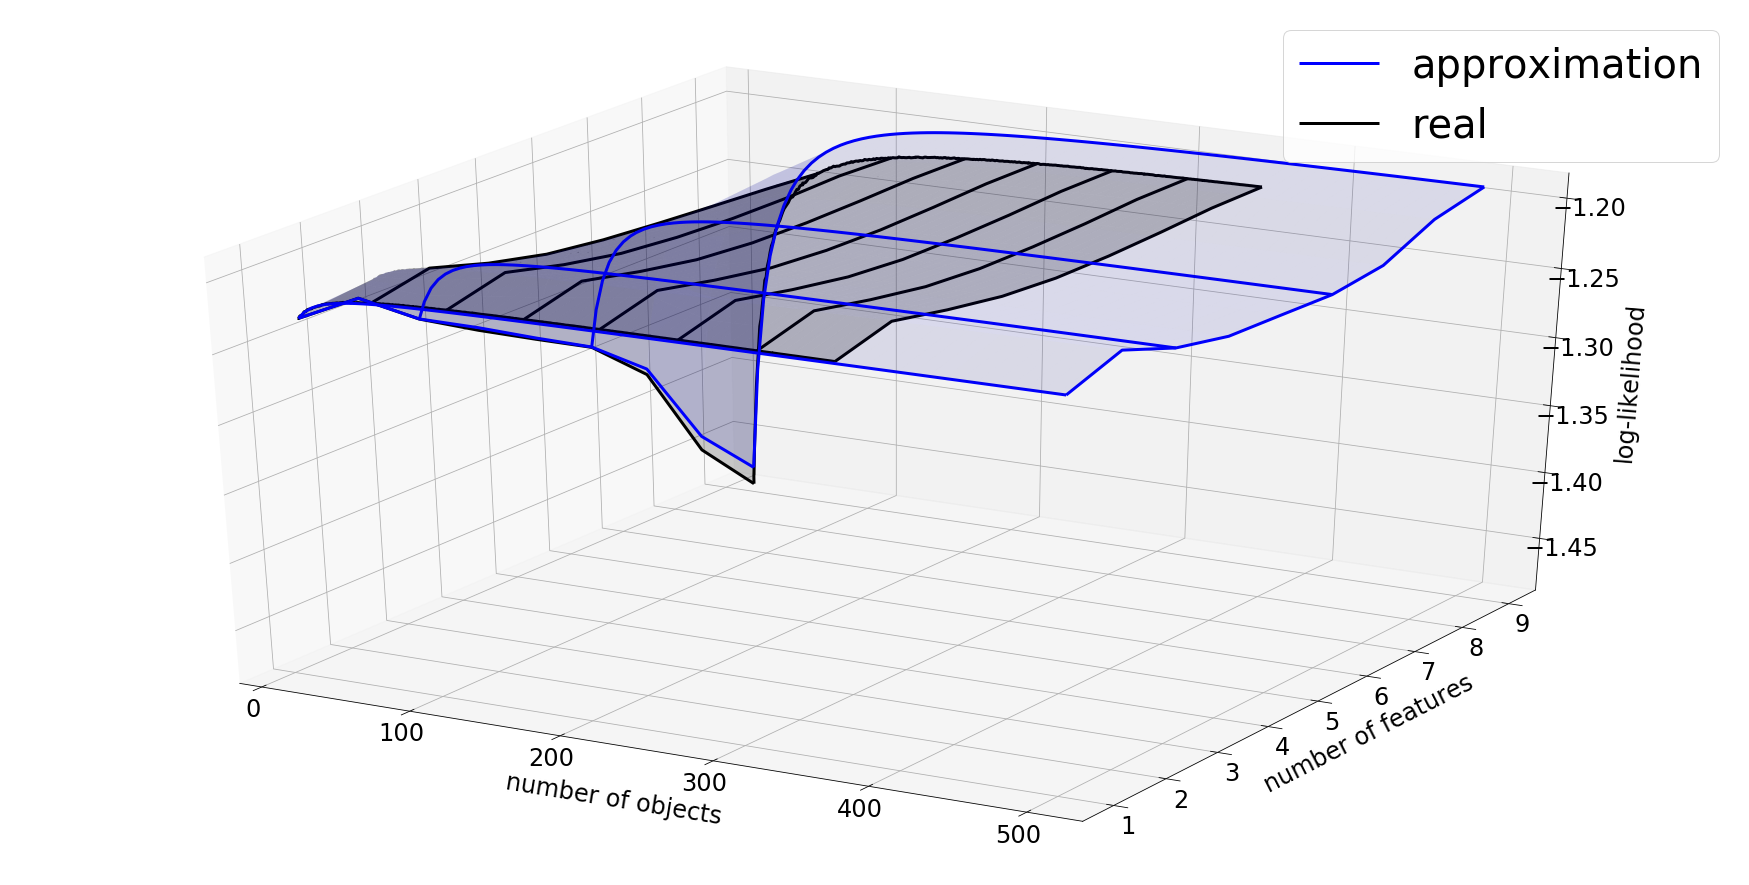

In [26]:
fig = plt.figure()
axes = Axes3D(fig)

x = SampleStep_approximate
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))
xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean_approximate)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=3, cstride=2000, color ='blue', label = "approximation")
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.1, color ='blue')


x = SampleStep
y = 1-(np.linspace(0, ordering.shape[0] - 2, ordering.shape[0]-1, dtype = np.int64) - (ordering.shape[0] - 2))
xgrid, ygrid = np.meshgrid(x, y)
zgrid = np.array(List_mean)
axes.plot_wireframe(xgrid, ygrid, zgrid, rstride=100, cstride=50, color ='black', label = "real")
axes.plot_surface(xgrid, ygrid, zgrid, alpha = 0.2, color ='black')

axes.set_xlabel("number of objects", labelpad=30)
axes.set_ylabel("number of features", labelpad=20)
axes.set_zlabel("log-likelihood", labelpad=20)

plt.legend(loc = "best")
plt.savefig("./figures/Diabetes5000Approx.pdf")
plt.show()




